In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal
import numpy as np


In [37]:
df_bennin = pd.read_csv("C:/Users/User/Desktop/Week_0/Moonlight-Solar-Farm-Analysis/Data/benin_clean.csv")
df_togo = pd.read_csv("C:/Users/User/Desktop/Week_0/Moonlight-Solar-Farm-Analysis/Data/sierraleone_clean.csv")
df_sierraleone= pd.read_csv("C:/Users/User/Desktop/Week_0/Moonlight-Solar-Farm-Analysis/Data/togo_clean.csv")

In [38]:
# Add Country Labels
df_bennin["Country"] = "Benin"
df_togo["Country"] = "Togo"
df_sierraleone["Country"] = "Sierra Leone"

#  Combine DataFrames
df_all = pd.concat([df_bennin, df_togo, df_sierraleone], ignore_index=True)

#  Target Metrics
metrics = ['GHI', 'DNI', 'DHI']

In [39]:
df_bennin.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Country'],
      dtype='object')

In [40]:
df_bennin.head

<bound method NDFrame.head of                   Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0       2021-08-09 00:01:00  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0   
1       2021-08-09 00:02:00  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0   
2       2021-08-09 00:03:00  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3   
3       2021-08-09 00:04:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2   
4       2021-08-09 00:05:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1   
...                     ...  ...  ...  ...   ...   ...   ...   ...  ...   
517702  2022-08-08 23:56:00  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.3   
517703  2022-08-08 23:57:00  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.2   
517704  2022-08-08 23:58:00  0.0  0.0  0.0   0.0   0.0  23.1  98.4  0.6   
517705  2022-08-08 23:59:00  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.9   
517706  2022-08-09 00:00:00  0.0  0.0  0.0   0.0   0.0  23.1  98.3  1.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation

boxplot

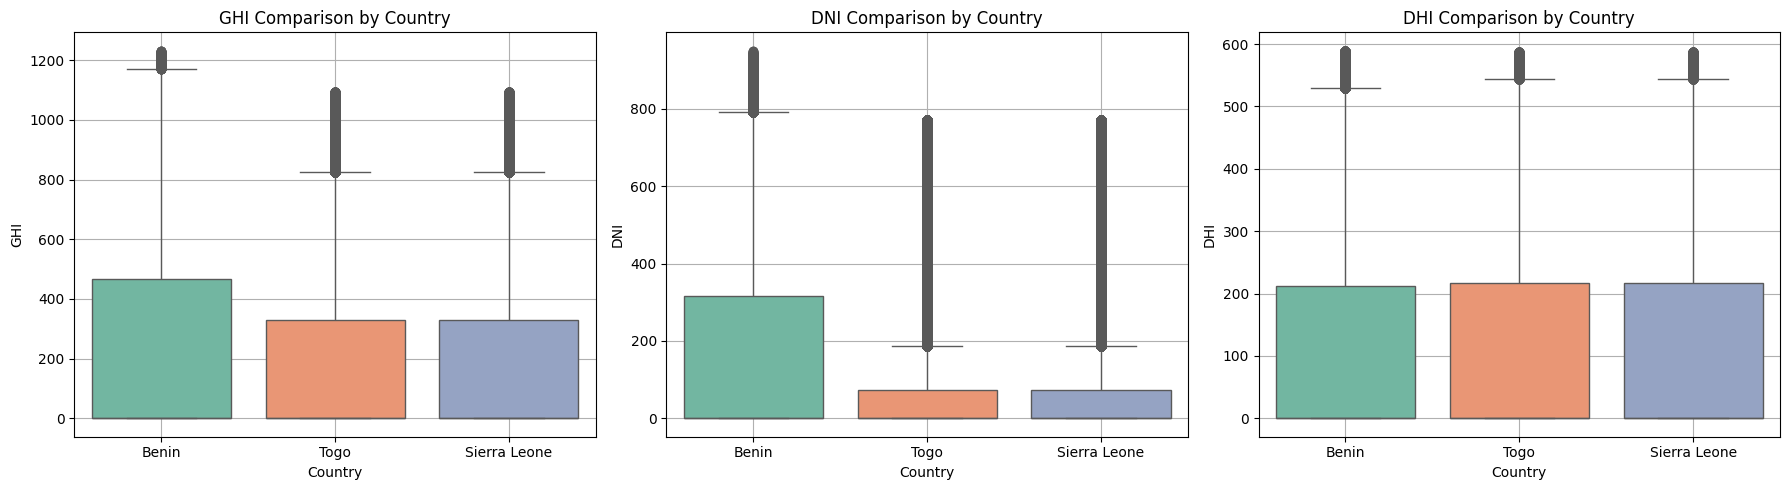

In [41]:

plt.figure(figsize=(18, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df_all, x='Country', y=metric, hue='Country', palette='Set2', dodge=False)
    plt.title(f'{metric} Comparison by Country')
    plt.ylabel(metric)
    plt.xlabel("Country")
    plt.legend([],[], frameon=False)  # Remove duplicate legend
    plt.grid(True)

plt.tight_layout()
plt.show()


summary

In [42]:
# Compute Mean, Median, and Std Dev
summary_stats = df_all.groupby("Country")[metrics].agg(['mean', 'median', 'std']).round(2)
summary_stats

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         237.48    0.6  327.17  167.14    0.0  261.94  113.17    0.4   
Sierra Leone  187.21    0.0  277.02  104.21    0.0  200.82  110.50    0.0   
Togo          187.21    0.0  277.02  104.21    0.0  200.82  110.50    0.0   

                      
                 std  
Country               
Benin         151.66  
Sierra Leone  151.44  
Togo          151.44

C:\Users\User\AppData\Local\Temp\ipykernel_12216\2630236558.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')


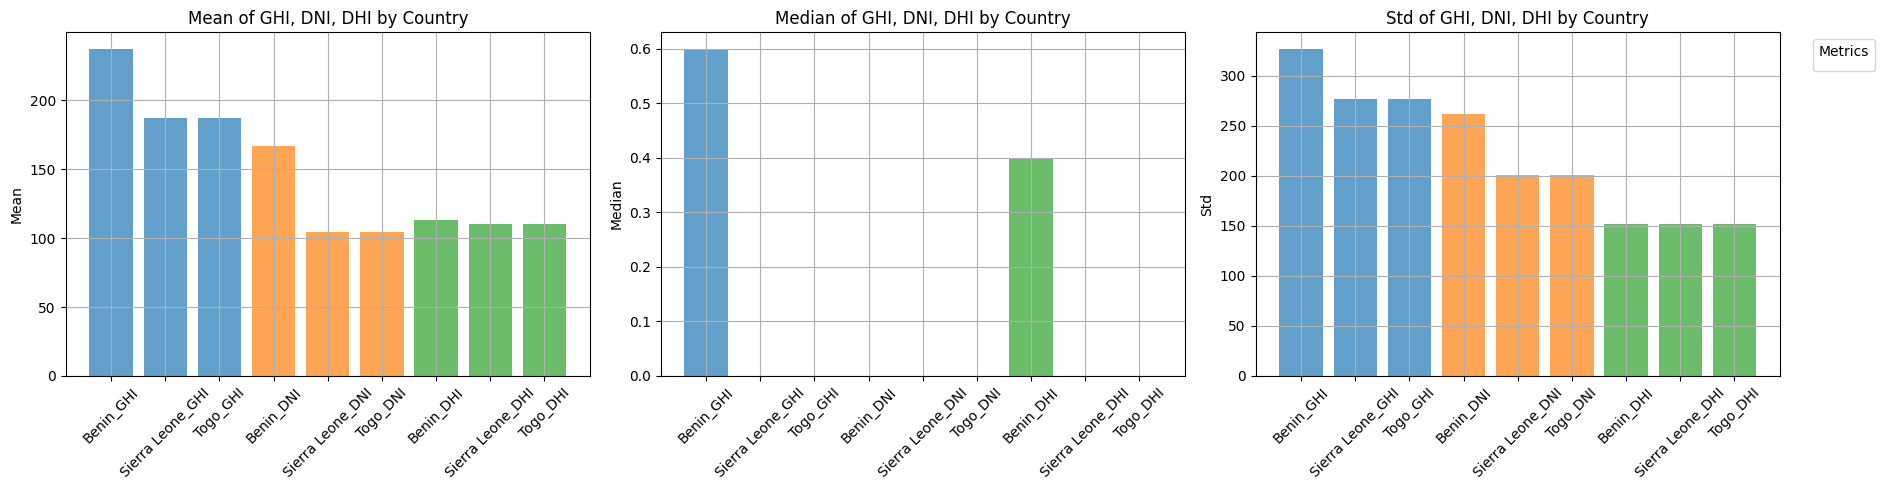

In [43]:

# Flatten the MultiIndex columns
summary_stats.columns = ['_'.join(col) for col in summary_stats.columns]

# Plotting setup
stat_types = ['mean', 'median', 'std']
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

plt.figure(figsize=(18, 5))

for i, stat in enumerate(stat_types, 1):
    plt.subplot(1, 3, i)
    for j, metric in enumerate(metrics):
        plt.bar(
            x=[country + f"_{metric}" for country in summary_stats.index],
            height=summary_stats[f'{metric}_{stat}'],
            label=metric if i == 1 else "",
            alpha=0.7
        )
    plt.title(f'{stat.capitalize()} of GHI, DNI, DHI by Country')
    plt.xticks(rotation=45)
    plt.ylabel(stat.capitalize())
    plt.grid(True)

plt.tight_layout()
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


●	Statistical Testing 

In [44]:
# Extract GHI values by country
ghi_benin = df_bennin['GHI']
ghi_togo = df_togo['GHI']
ghi_sierra = df_sierraleone['GHI']

# One-way ANOVA
anova_result = f_oneway(ghi_benin, ghi_togo, ghi_sierra)

# Kruskal-Wallis test (non-parametric alternative)
kruskal_result = kruskal(ghi_benin, ghi_togo, ghi_sierra)

print("One-way ANOVA p-value:", round(anova_result.pvalue, 5))
print("Kruskal–Wallis p-value:", round(kruskal_result.pvalue, 5))


One-way ANOVA p-value: 0.0
Kruskal–Wallis p-value: 0.0


###  Key Observations

1. **Benin consistently shows the highest solar potential:**
   - It has the **highest mean and median GHI and DNI**, indicating stronger and more consistent solar radiation.  
   - However, it also shows the **highest variability (standard deviation)** across all metrics, especially in GHI, suggesting more fluctuation in solar conditions.

2. **Togo displays the lowest DNI across all statistical measures:**
   - Togo’s **DNI is significantly lower** than both Benin and Sierra Leone in terms of **mean and median**, making it potentially less suitable for concentrated solar technologies that rely on direct sunlight.

3. **DHI values are fairly consistent across all countries:**
   - Unlike GHI and DNI, the **Diffuse Horizontal Irradiance (DHI)** remains **relatively uniform** in mean, median, and standard deviation, suggesting diffuse solar energy levels don’t vary significantly by country.


more visualization

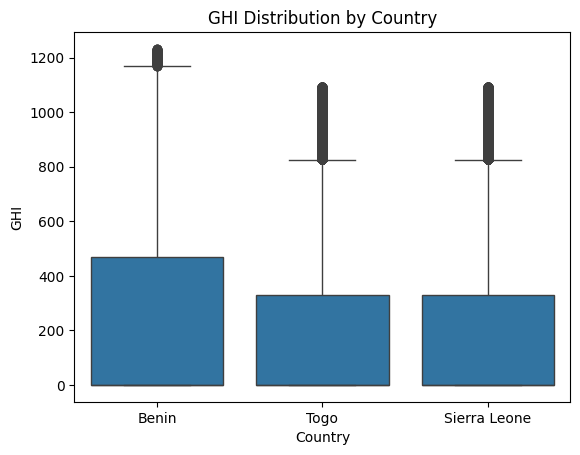

In [45]:
sns.boxplot(data=df_all, x='Country', y='GHI')
plt.title('GHI Distribution by Country')
plt.show()


Text(0.5, 1.0, 'Average DNI by Country')

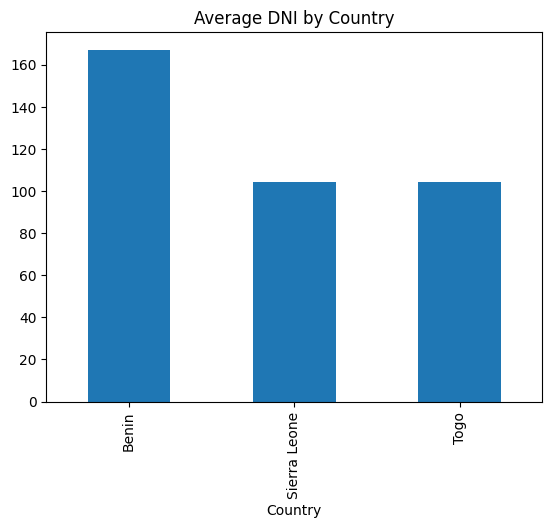

In [46]:
df_all.groupby('Country')['DNI'].mean().plot(kind='bar')
plt.title('Average DNI by Country')


C:\Users\User\AppData\Local\Temp\ipykernel_12216\2149097241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set3')


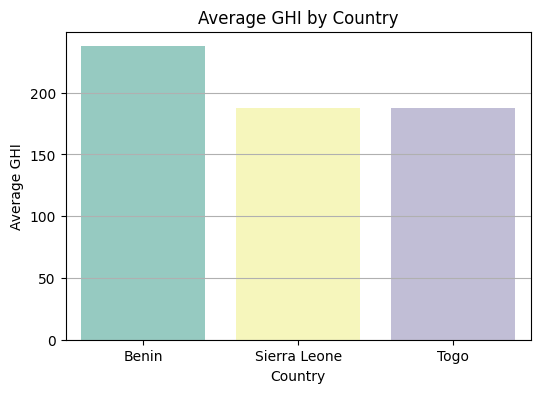

In [50]:
# Bar Chart of Average GHI per Country
avg_ghi = df_all.groupby("Country")['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set3')
plt.title("Average GHI by Country")
plt.ylabel("Average GHI")
plt.grid(axis='y')
plt.show()


I've achieved a comprehensive understanding of solar potential across Benin, Togo, and Sierra Leone. Our comparative analysis, statistical testing, and clear visual summaries provide actionable insights for renewable energy planning. Benin consistently shows the most promising solar metrics, although with higher variability, while Togo lags particularly in DNI. Sierra Leone holds a middle ground. The groundwork is now laid for developing predictive models, ranking algorithms, and dashboards to support decision-making on solar farm placement. I've remain committed to data quality, reproducibility, and evidence-based recommendations as i've move into the modeling and deployment phases.
so i've choose Bennin 
